In [1]:
import torch
import pandas as pd
import numpy as np
import csv
from hanspell import spell_checker
from collections import Counter
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
data_kurly = pd.read_excel("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_temp.xlsx")

In [127]:
data_kurly.to_csv("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_0724.csv")

In [2]:
data_kurly = pd.read_csv("C:/Users/NT550-048/Desktop/잇더/data/data_kurly_0724.csv")

In [3]:
data_kurly.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df_1 = data_kurly[data_kurly['ProductName'] == '[아우름] 바다를 품은 톳 해물솥밥키트']

In [19]:
df_1.reset_index(inplace=True)
df_1.drop('index', axis=1, inplace=True)

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_9760\1295800429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('index', axis=1, inplace=True)


In [20]:
df_1

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score,tokens,fixed_ReviewText,token_tuple,token_selected,token_nouns
0,1000098225,일반,송**,[아우름] 바다를 품은 톳 해물솥밥키트,간단한 한끼대용으로 좋네요,2023.07.12,0,1,0.970708,"['간단하다/Adjective', '하다/Verb', '끼/Noun', '대용/No...",간단한 한 끼 대용으로 좋네요,"[('간단하다', 'Adjective'), ('하다', 'Verb'), ('끼', ...","['간단하다', '하다', '끼', '대용', '좋다']","['끼', '대용']"
1,1000098225,화이트,최**,[아우름] 바다를 품은 톳 해물솥밥키트,아침대용으로 간단하고좋아요,2023.07.11,0,1,0.949967,"['아침/Noun', '대용/Noun', '으로/Josa', '간단하다/Adject...",아침 대용으로 간단하고 좋아요,"[('아침', 'Noun'), ('대용', 'Noun'), ('으로', 'Josa'...","['아침', '대용', '간단하다', '좋다']","['아침', '대용']"
2,1000098225,라벤더,곽**,[아우름] 바다를 품은 톳 해물솥밥키트,톳좋아해서 주문했어요.,2023.07.11,0,1,0.981879,"['톳/Noun', '좋아하다/Adjective', '주문/Noun', '하다/Ve...",톳좋아해서 주문했어요.,"[('톳', 'Noun'), ('좋아하다', 'Adjective'), ('주문', ...","['톳', '좋아하다', '주문', '하다']","['톳', '주문']"
3,1000098225,화이트,김**,[아우름] 바다를 품은 톳 해물솥밥키트,지난 번에 간편하면서도 맛있게 먹어서 또 주문 했습니다.,2023.07.11,0,1,0.993944,"['지난번/Noun', '에/Josa', '간편하다/Adjective', '맛있다/...",지난번에 간편하면서도 맛있게 먹어서 또 주문했습니다.,"[('지난번', 'Noun'), ('에', 'Josa'), ('간편하다', 'Adj...","['지난번', '간편하다', '맛있다', '먹다', '또', '주문', '하다']","['지난번', '또', '주문']"
4,1000098225,화이트,선**,[아우름] 바다를 품은 톳 해물솥밥키트,가족들이 주문해서 잘 먹었어요 ㅎㅎ,2023.07.10,0,1,0.993280,"['가족/Noun', '들/Suffix', '이/Josa', '주문/Noun', '...",가족들이 주문해서 잘 먹었어요 ㅎㅎ,"[('가족', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'...","['가족', '주문', '하다', '자다', '먹다']","['가족', '주문']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1000098225,일반,김**,[아우름] 바다를 품은 톳 해물솥밥키트,가족이 많아서 많이 시켰는데 기대됩니다. 맛있기를 요새 해물솥밥 엄청 땡기더라구요,2022.12.24,4,1,0.994258,"['가족/Noun', '이/Josa', '많다/Adjective', '많이/Adve...",가족이 많아서 많이 시켰는데 기대됩니다. 맛있기를 요새 해물 솥밥 엄청 당기더라고요,"[('가족', 'Noun'), ('이', 'Josa'), ('많다', 'Adject...","['가족', '많다', '시키다', '기대', '되다', '맛있다', '요새', '...","['가족', '기대', '요새', '해물', '솥밥']"
418,1000098225,화이트,김**,[아우름] 바다를 품은 톳 해물솥밥키트,아직먹기전...할인해서 사봤어요,2022.12.23,2,1,0.838672,"['아직/Adverb', '먹기/Noun', '전/Noun', '.../Punctu...",아직 먹기 전... 할인해서 사봤어요,"[('아직', 'Adverb'), ('먹기', 'Noun'), ('전', 'Noun...","['먹기', '전', '할인', '하다', '사보다']","['먹기', '전', '할인']"
419,1000098225,퍼플,이**,[아우름] 바다를 품은 톳 해물솥밥키트,아직 주말에 먹어보려고,2022.12.22,2,1,0.707693,"['아직/Adverb', '주말/Noun', '에/Josa', '먹다/Verb', ...",아직 주말에 먹어보려고,"[('아직', 'Adverb'), ('주말', 'Noun'), ('에', 'Josa...","['주말', '먹다', '보다']",['주말']
420,1000098225,일반,김**,[아우름] 바다를 품은 톳 해물솥밥키트,첫구매인데 후기도 없어 구매해봤어요.,2022.12.22,2,1,0.958569,"['첫/Noun', '구매/Noun', '인데/Josa', '후기/Noun', '도...",첫 구매인데 후기도 없어 구매해 봤어요.,"[('첫', 'Noun'), ('구매', 'Noun'), ('인데', 'Josa')...","['첫', '구매', '후기', '없다', '구매', '하다', '보다']","['첫', '구매', '후기', '구매']"


In [43]:
# 문자열 형태 리스트를 리스트 형태로 변환
df_1['token_selected'] = df_1['token_selected'].apply(lambda x:eval(x))

C:\Users\NT550-048\AppData\Local\Temp\ipykernel_9760\2521298256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['token_selected'] = df_1['token_selected'].apply(lambda x:eval(x))


# 원형 살리지 않고 토큰화

In [11]:
def token_pos(x):
    tagger = Okt()
    tokened = tagger.pos(x)
    return tokened

In [10]:
# 튜플 리스트 받아서 명사/동사/형용사만 추출
# word_class = ['Noun', 'Verb', 'Adjective']
def token_select(token_tuple_list, word_class):
    selected_token = []
    for token_review in token_tuple_list:
        if token_review[1] in word_class:
            selected_token.append(token_review[0])
    return selected_token

In [59]:
data_kurly['tokens_noStem'] = data_kurly['fixed_ReviewText'].apply(lambda x:token_pos(x))

In [63]:
data_kurly['token_noStem_selected'] = data_kurly['tokens_noStem'].apply(lambda x:token_select(x))

In [66]:
data_kurly.head(1)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score,tokens,fixed_ReviewText,token_tuple,token_selected,token_nouns,tokens_noStem,token_noStem
0,1000098225,일반,송**,[아우름] 바다를 품은 톳 해물솥밥키트,간단한 한끼대용으로 좋네요,2023.07.12,0,1,0.970708,"['간단하다/Adjective', '하다/Verb', '끼/Noun', '대용/No...",간단한 한 끼 대용으로 좋네요,"[('간단하다', 'Adjective'), ('하다', 'Verb'), ('끼', ...","['간단하다', '하다', '끼', '대용', '좋다']","['끼', '대용']","[(간단한, Adjective), (한, Verb), (끼, Noun), (대용, ...","[간단한, 한, 끼, 대용, 좋네요]"


In [68]:
df_1 = data_kurly[data_kurly['ProductName']=='[아우름] 바다를 품은 톳 해물솥밥키트']

In [81]:
df_1['tokens_noStem'].apply(lambda x:token_select(x, ['Noun']))

0                                                 [끼, 대용]
2                                                [아침, 대용]
3                                                 [톳, 주문]
4                                            [지난번, 또, 주문]
10                                               [가족, 주문]
                              ...                        
1192                                 [가족, 기대, 요새, 해물, 솥밥]
1197                                          [먹기, 전, 할인]
1199                                                 [주말]
1202                                      [첫, 구매, 후기, 구매]
1203    [해물, 솥밥, 육수, 솥밥, 수, 해물, 톳, 맛, 새우, 두, 마리, 서로, 냉...
Name: tokens_noStem, Length: 422, dtype: object

In [89]:
temp = Counter(sum(df_1['token_noStem'].to_list(), [])).most_common(300)

In [92]:
pd.DataFrame(temp, columns=[1,2])

,1,2
0,솥밥,86
1,맛있어요,67
2,해물,65
3,맛,56
4,육수,55
...,...,...
295,물이,3
296,본,3
297,압력밥솥,3
298,넣는,3


# 워드클라우드

In [9]:
#워드클라우드 함수
def wc_kurly(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=8000, height=5000, mask=imgArray).generate_from_frequencies(words)
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

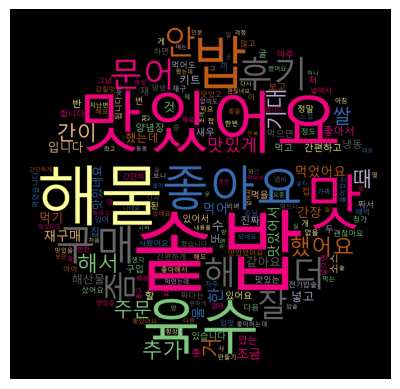

In [72]:
wc_kurly(df_1['token_noStem'])

# 빈도수, 워드클라우드 한번에 보여주는 함수

In [95]:
# 빈도수 함수
def word_analysis(df, product_name, label, token_class):
    df_word = df[(df['ProductName']==product_name)&(df['pred_label']==label)]
    word_list = df_word['tokens_noStem'].apply(lambda x:token_select(x, token_class))
    word_tuple = Counter(sum(word_list.to_list(), [])).most_common(300)
    #word_df = pd.DataFrame(word_tuple, columns=['token', 'n'])
    return word_tuple
    

In [7]:
def word_analysis(df, product_name, label, token_class):
    df_word = df[(df['ProductName']==product_name)&(df['pred_label']==label)]
    word_list = df_word['tokens_noStem'].apply(lambda x:token_select(x, token_class))
    word_tuple = Counter(sum(word_list.to_list(), [])).most_common(300)
    #word_df = pd.DataFrame(word_tuple, columns=['token', 'n'])
    words = dict(word_tuple)
    img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=8000, height=5000, mask=imgArray).generate_from_frequencies(words)
    plt.imshow(wordcloud) 
    plt.axis('off')
    if label == 1:
        label = '긍정리뷰'
    else:
        label = '부정리뷰'
    print(product_name, '상품의 총', len(df_word), '개의', label, '분석')
    return word_tuple, plt.show()

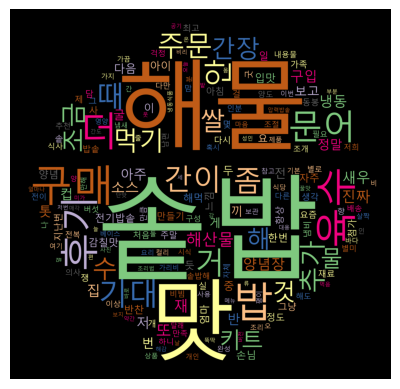

([('솥밥', 80),
  ('해물', 56),
  ('맛', 48),
  ('구매', 47),
  ('밥', 45),
  ('육수', 44),
  ('더', 41),
  ('후기', 39),
  ('문어', 35),
  ('기대', 33),
  ('거', 32),
  ('간이', 30),
  ('때', 29),
  ('안', 29),
  ('좀', 29),
  ('주문', 27),
  ('추가', 25),
  ('먹기', 24),
  ('조금', 23),
  ('쌀', 23),
  ('수', 22),
  ('간장', 22),
  ('해', 21),
  ('것', 20),
  ('키트', 19),
  ('물', 19),
  ('해산물', 18),
  ('또', 17),
  ('재', 15),
  ('진짜', 15),
  ('새우', 14),
  ('집', 14),
  ('냉동', 14),
  ('양념장', 14),
  ('소스', 14),
  ('저', 13),
  ('구입', 13),
  ('톳', 12),
  ('아주', 12),
  ('컵', 12),
  ('반', 12),
  ('정말', 11),
  ('보고', 11),
  ('번', 11),
  ('끼', 10),
  ('전', 10),
  ('굴', 10),
  ('다음', 9),
  ('게', 9),
  ('이', 8),
  ('아이', 8),
  ('두', 8),
  ('입맛', 8),
  ('중', 8),
  ('반찬', 7),
  ('일', 7),
  ('요', 7),
  ('엄마', 7),
  ('듯', 7),
  ('자주', 7),
  ('감칠맛', 7),
  ('전기밥솥', 7),
  ('느낌', 7),
  ('한번', 7),
  ('손님', 7),
  ('해먹', 7),
  ('양념', 7),
  ('아침', 6),
  ('지난번', 6),
  ('항상', 6),
  ('그냥', 6),
  ('정도', 6),
  ('사', 6),
  ('만들기', 6),
  ('첨가', 6),
  

In [103]:
product_name = '[아우름] 바다를 품은 톳 해물솥밥키트'
label = 1
token_class = ['Noun']
word_analysis(data_kurly, product_name, label, token_class)

In [4]:
data_kurly['tokens_noStem'] = data_kurly['tokens_noStem'].apply(lambda x:eval(x))

In [18]:
data_kurly['ProductName'].unique()

array(['[아우름] 바다를 품은 톳 해물솥밥키트', '[아우름] 바다를 품은 문어솥밥키트',
       '[치즈룸x테이스팅룸] 전복 솥밥 리조또', '[콜린스 다이닝] 건강가득 전복솥밥 키트',
       '[콜린스 다이닝] 한돈 가지 솥밥 키트', '[수린] 한우 사골 솥밥 밀키트 (2인분)',
       '[온하루] 구운 삼치 솥밥키트', '[온하루] 구운 생선 솥밥키트', '[콜린스 다이닝] 도미 솥밥 키트',
       '[콜린스 다이닝] 미나리 소고기 솥밥 키트', '[온하루] 한돈 건나물 솥밥키트'], dtype=object)

[아우름] 바다를 품은 톳 해물솥밥키트 상품의 총 383 개의 긍정리뷰 분석


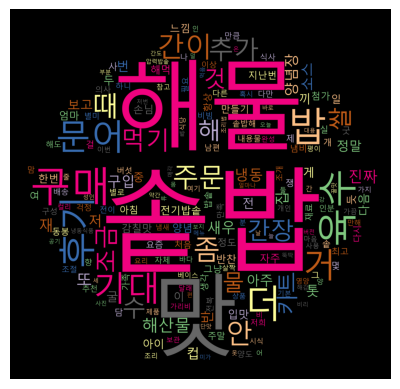

([('솥밥', 80),
  ('해물', 56),
  ('맛', 48),
  ('구매', 47),
  ('밥', 45),
  ('육수', 44),
  ('더', 41),
  ('후기', 39),
  ('문어', 35),
  ('기대', 33),
  ('거', 32),
  ('간이', 30),
  ('때', 29),
  ('안', 29),
  ('좀', 29),
  ('주문', 27),
  ('추가', 25),
  ('먹기', 24),
  ('조금', 23),
  ('쌀', 23),
  ('수', 22),
  ('간장', 22),
  ('해', 21),
  ('것', 20),
  ('키트', 19),
  ('물', 19),
  ('해산물', 18),
  ('또', 17),
  ('재', 15),
  ('진짜', 15),
  ('새우', 14),
  ('집', 14),
  ('냉동', 14),
  ('양념장', 14),
  ('소스', 14),
  ('저', 13),
  ('구입', 13),
  ('톳', 12),
  ('아주', 12),
  ('컵', 12),
  ('반', 12),
  ('정말', 11),
  ('보고', 11),
  ('번', 11),
  ('끼', 10),
  ('전', 10),
  ('굴', 10),
  ('다음', 9),
  ('게', 9),
  ('이', 8),
  ('아이', 8),
  ('두', 8),
  ('입맛', 8),
  ('중', 8),
  ('반찬', 7),
  ('일', 7),
  ('요', 7),
  ('엄마', 7),
  ('듯', 7),
  ('자주', 7),
  ('감칠맛', 7),
  ('전기밥솥', 7),
  ('느낌', 7),
  ('한번', 7),
  ('손님', 7),
  ('해먹', 7),
  ('양념', 7),
  ('아침', 6),
  ('지난번', 6),
  ('항상', 6),
  ('그냥', 6),
  ('정도', 6),
  ('사', 6),
  ('만들기', 6),
  ('첨가', 6),
  

In [42]:
word_analysis(data_kurly, '[아우름] 바다를 품은 톳 해물솥밥키트', 1, ['Noun'])

# 단어 연관 분석

In [13]:
from gensim.models import Word2Vec

In [14]:
review_list = data_kurly['token_selected'].to_list()

In [45]:
data_kurly['ProductName'].unique()

array(['[아우름] 바다를 품은 톳 해물솥밥키트', '[아우름] 바다를 품은 문어솥밥키트',
       '[치즈룸x테이스팅룸] 전복 솥밥 리조또', '[콜린스 다이닝] 건강가득 전복솥밥 키트',
       '[콜린스 다이닝] 한돈 가지 솥밥 키트', '[수린] 한우 사골 솥밥 밀키트 (2인분)',
       '[온하루] 구운 삼치 솥밥키트', '[온하루] 구운 생선 솥밥키트', '[콜린스 다이닝] 도미 솥밥 키트',
       '[콜린스 다이닝] 미나리 소고기 솥밥 키트', '[온하루] 한돈 건나물 솥밥키트'], dtype=object)

In [58]:
len(data_kurly[data_kurly['ProductName'] == '[온하루] 한돈 건나물 솥밥키트'])

339

In [5]:
data_kurly['token_selected'] = data_kurly['token_selected'].apply(lambda x:eval(x))

In [36]:
review_list = data_kurly['token_selected'].to_list()

In [53]:
review_list = data_kurly[data_kurly['ProductName'] == '[온하루] 한돈 건나물 솥밥키트']['token_selected'].to_list()

In [54]:
model = Word2Vec(sentences = review_list, vector_size = 100, window = 5, min_count = 10, workers = 4, sg = 1)

In [55]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

In [56]:
import plotly
import plotly.graph_objects as go
# annotation text 만들기 (시각화할 때 벡터 말고 단어도 필요하니까)
# vocabs = word_vectors.vocab.keys()

text=[]
for i,v in enumerate(vocabs):
    text.append(v)

fig = go.Figure(data=go.Scatter(x=xs,
                                y=ys,
                                mode='markers+text',
                                text=text)) 

fig.update_layout(title='Kurly Review')
fig.show()

plotly.offline.plot(
fig, filename='kurly_review.html'
)
fig.write_html("C:/Users/NT550-048/Desktop/잇더/솥밥/kurly_review_온하루한돈건나물솥밥.html")

In [28]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

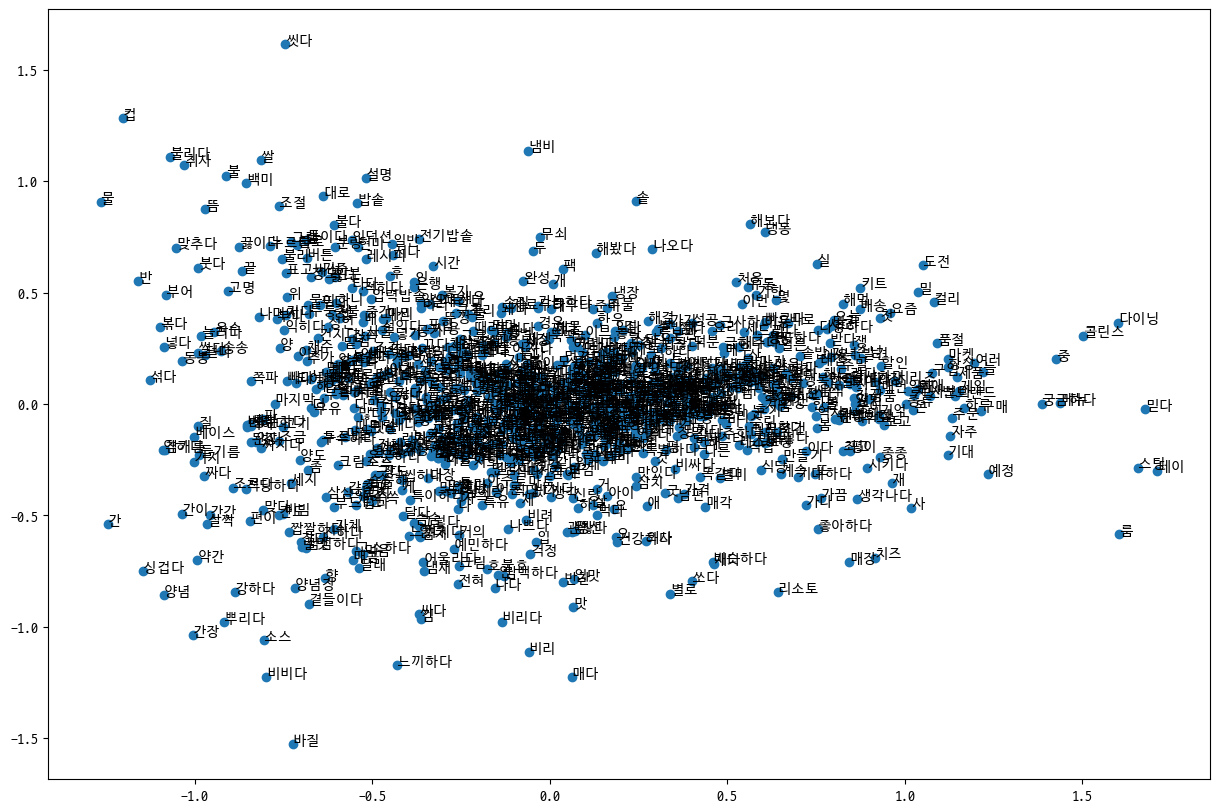

In [18]:
import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)

In [41]:
model.wv.most_similar('간편하다')

[('간단하다', 0.9346107244491577),
 ('편하다', 0.9295068979263306),
 ('쉽다', 0.8761822581291199),
 ('쉬다', 0.8698830604553223),
 ('영양', 0.8507290482521057),
 ('손쉽다', 0.8468399047851562),
 ('챙기다', 0.8391172885894775),
 ('편리하다', 0.8377386927604675),
 ('즐기다', 0.8289967775344849),
 ('고급', 0.8254551291465759)]

In [19]:
# annotation text 만들기 (시각화할 때 벡터 말고 단어도 필요하니까)
# vocabs = word_vectors.vocab.keys()

text=[]
for i,v in enumerate(vocabs):
    text.append(v)

In [20]:
import plotly
import plotly.graph_objects as go
# annotation text 만들기 (시각화할 때 벡터 말고 단어도 필요하니까)
# vocabs = word_vectors.vocab.keys()

text=[]
for i,v in enumerate(vocabs):
    text.append(v)

fig = go.Figure(data=go.Scatter(x=xs,
                                y=ys,
                                mode='markers+text',
                                text=text)) 

fig.update_layout(title='Naver Word2Vec')
fig.show()

plotly.offline.plot(
fig, filename='naver_word2vec.html'
)
fig.write_html("C:/Users/NT550-048/Desktop/잇더/솥밥/kurly_review.html")